In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/softRD_pileup/CD4mixture_output_81205_sorted_softMultiprocessing_binnedstats.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']

inbindf=inbindf.reset_index()
inbindf.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,CD4.HWI-7001432L_73:1:1107:12469:51878#12,-0.036875,-0.014465,-0.032824,0.107637,-0.027901,-0.036004,0.032637,-0.033645,-0.010901,...,1.0,6.0,7.0,0.142857,NK-others,0.753462,NK-others,0.107637,NK-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
1,CD4.HWI-7001432L_73:1:1115:16112:84772#12,0.323955,0.114314,-0.104840,-0.069122,-0.105558,-0.095865,0.054455,-0.100532,-0.085006,...,1.0,1.0,2.0,0.500000,CD4-others,0.647910,CD4-others,0.323955,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
2,CD4.HWI-7001432L_73:1:1302:20130:90923#12,3.927474,2.277269,-0.868064,-0.677449,-0.849756,-0.788372,-0.060910,-0.853705,-0.711910,...,5.0,0.0,5.0,1.000000,CD4-others,3.927474,CD4-others,3.927474,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
3,CD4.HWI-7001432L_73:1:1314:16857:93901#12,-0.059953,-0.039132,-0.039132,-0.033748,-0.028363,0.016987,-0.044397,-0.027047,0.448654,...,2.0,4.0,6.0,0.333333,Eo-others,1.345962,Eo-others,0.448654,Eo-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
4,CD4.HWI-7001432L_73:1:1316:18336:69206#12,-0.110487,-0.147821,0.234846,-0.082846,-0.123051,-0.140641,0.055359,-0.040487,-0.141179,...,1.0,0.0,1.0,1.000000,mB-others,0.849410,mB-others,0.849410,mB-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,CD4.HWI-7001432L_73:1:1107:12469:51878#12,-0.036875,-0.014465,-0.032824,0.107637,-0.027901,-0.036004,0.032637,-0.033645,-0.010901,...,1.0,6.0,7.0,0.142857,NK-others,0.753462,NK-others,0.107637,NK-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
1,CD4.HWI-7001432L_73:1:1115:16112:84772#12,0.323955,0.114314,-0.104840,-0.069122,-0.105558,-0.095865,0.054455,-0.100532,-0.085006,...,1.0,1.0,2.0,0.500000,CD4-others,0.647910,CD4-others,0.323955,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
2,CD4.HWI-7001432L_73:1:1302:20130:90923#12,3.927474,2.277269,-0.868064,-0.677449,-0.849756,-0.788372,-0.060910,-0.853705,-0.711910,...,5.0,0.0,5.0,1.000000,CD4-others,3.927474,CD4-others,3.927474,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
3,CD4.HWI-7001432L_73:1:1314:16857:93901#12,-0.059953,-0.039132,-0.039132,-0.033748,-0.028363,0.016987,-0.044397,-0.027047,0.448654,...,2.0,4.0,6.0,0.333333,Eo-others,1.345962,Eo-others,0.448654,Eo-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...
4,CD4.HWI-7001432L_73:1:1316:18336:69206#12,-0.110487,-0.147821,0.234846,-0.082846,-0.123051,-0.140641,0.055359,-0.040487,-0.141179,...,1.0,0.0,1.0,1.000000,mB-others,0.849410,mB-others,0.849410,mB-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT
0,CD4.HWI-7001432L_73:1:1107:12469:51878#12,-0.036875,-0.014465,-0.032824,0.107637,-0.027901,-0.036004,0.032637,-0.033645,-0.010901,...,7.0,0.142857,NK-others,0.753462,NK-others,0.107637,NK-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,Notassigned,Notassigned
1,CD4.HWI-7001432L_73:1:1115:16112:84772#12,0.323955,0.114314,-0.104840,-0.069122,-0.105558,-0.095865,0.054455,-0.100532,-0.085006,...,2.0,0.500000,CD4-others,0.647910,CD4-others,0.323955,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,Notassigned,Notassigned
2,CD4.HWI-7001432L_73:1:1302:20130:90923#12,3.927474,2.277269,-0.868064,-0.677449,-0.849756,-0.788372,-0.060910,-0.853705,-0.711910,...,5.0,1.000000,CD4-others,3.927474,CD4-others,3.927474,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,Notassigned,Notassigned
3,CD4.HWI-7001432L_73:1:1314:16857:93901#12,-0.059953,-0.039132,-0.039132,-0.033748,-0.028363,0.016987,-0.044397,-0.027047,0.448654,...,6.0,0.333333,Eo-others,1.345962,Eo-others,0.448654,Eo-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,Notassigned,Notassigned
4,CD4.HWI-7001432L_73:1:1316:18336:69206#12,-0.110487,-0.147821,0.234846,-0.082846,-0.123051,-0.140641,0.055359,-0.040487,-0.141179,...,1.0,1.000000,mB-others,0.849410,mB-others,0.849410,mB-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,index,CD4-others,CD8-others,nB-others,NK-others,Mn-others,mNeu-others,m8-others,DC-others,Eo-others,...,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
0,CD4.HWI-7001432L_73:1:1107:12469:51878#12,-0.036875,-0.014465,-0.032824,0.107637,-0.027901,-0.036004,0.032637,-0.033645,-0.010901,...,NK-others,0.753462,NK-others,0.107637,NK-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,0.0381758,Er-others,0.0694615,0.0885495
1,CD4.HWI-7001432L_73:1:1115:16112:84772#12,0.323955,0.114314,-0.104840,-0.069122,-0.105558,-0.095865,0.054455,-0.100532,-0.085006,...,CD4-others,0.647910,CD4-others,0.323955,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,0.204147,m4-others,0.119808,0.221881
2,CD4.HWI-7001432L_73:1:1302:20130:90923#12,3.927474,2.277269,-0.868064,-0.677449,-0.849756,-0.788372,-0.060910,-0.853705,-0.711910,...,CD4-others,3.927474,CD4-others,3.927474,CD4-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,2.27727,CD8-others,1.65021,2.78884
3,CD4.HWI-7001432L_73:1:1314:16857:93901#12,-0.059953,-0.039132,-0.039132,-0.033748,-0.028363,0.016987,-0.044397,-0.027047,0.448654,...,Eo-others,1.345962,Eo-others,0.448654,Eo-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,0.0169872,mNeu-others,0.431667,0.44016
4,CD4.HWI-7001432L_73:1:1316:18336:69206#12,-0.110487,-0.147821,0.234846,-0.082846,-0.123051,-0.140641,0.055359,-0.040487,-0.141179,...,mB-others,0.849410,mB-others,0.849410,mB-others,CD4allrange_NR_81205_insilmix50_sorted_binneds...,0.234846,nB-others,0.614564,0.731987


In [7]:
allassigned.columns

Index(['index', 'CD4-others', 'CD8-others', 'nB-others', 'NK-others',
       'Mn-others', 'mNeu-others', 'm8-others', 'DC-others', 'Eo-others',
       'Tr-others', 'm4-others', 'Mg-others', 'Er-others', 'mB-others',
       'LENhypoCpG', 'LENhyperCpG', 'total_cpg', 'LENhypoCpG_BY_total_cpg',
       'maxscoredCT_beforeCpGweight', 'maxscore_beforeCpGweight',
       'maxscoredCT', 'maxscore', 'deltabasedfragassignment', 'filename',
       'secondmaxScore', 'secondmaxScoreCT', 'adjustedScore_minus',
       'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group['index'].str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.736856,0.740448,0.738828,0.719040,0.723248,0.672167
CD8,0.831921,0.833248,0.832881,0.813478,0.825143,0.772139
DC,0.872089,0.871121,0.872015,0.842320,0.857915,0.835339
Eo,0.927863,0.925045,0.927469,0.903249,0.924255,0.893713
Er,0.870120,0.870699,0.870624,0.857104,0.853755,0.792908


In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

,maxscore,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG,LENhypoCpG_0.5,LENhypoCpG_0.8
Celltype,,,,,,
CD4,0.323955,0.077431,0.148312,1.0,1.0,1.0
CD8,0.216868,0.197615,0.186182,2.0,1.0,1.0
DC,0.396641,0.259538,0.299160,1.0,1.0,1.0
Eo,0.315615,0.354308,0.325910,1.0,1.0,1.0
Er,0.273962,0.200308,0.211176,1.0,1.0,1.0


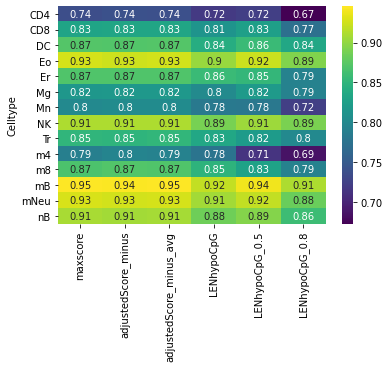

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)


2.3881711959838867
